## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random,math

data = load_boston()
X, y = data['data'], data['target']

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
    #plt.show()

def price(rm, k, b):
    '''f(x) = k * x + b'''
    return k * rm + b


X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

#draw_rm_and_price()
#plt.scatter(X_rm, price_by_random_k_and_b)
#plt.show()

def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(list(y))

def method_3():
    trying_times = 5000
    min_loss = float('inf')

    step = 0.00001
    k = random.randint(-100, 100)
    b = random.randint(-100 , 100)

    success_count = 0
    for i in range(trying_times):
        delta_k = 0
        delta_b = 0

        for x_, y_ in zip(list(X_rm), list(y)):
            #print(x, y)

            delta_k += abs(x_)
            delta_b += 1

        k = k - delta_k * step
        b = b - delta_b * step

        price_by_k_and_b = [price(r, k, b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)

        if current_loss < min_loss:

            min_loss = current_loss
            #print(delta_k, delta_b)
            print('time is: {}, best_k: {}, best_b: {}, and the loss is: {}'.format(i,k, b, min_loss))


method_3()





time is: 0, best_k: 77.96819975, best_b: 52.99494, and the loss is: 520.463762944651
time is: 1, best_k: 77.9363995, best_b: 52.98988, and the loss is: 520.2588499999749
time is: 2, best_k: 77.90459924999999, best_b: 52.98482, and the loss is: 520.0539370552989
time is: 3, best_k: 77.87279899999999, best_b: 52.97976, and the loss is: 519.8490241106231
time is: 4, best_k: 77.84099874999998, best_b: 52.9747, and the loss is: 519.6441111659459
time is: 5, best_k: 77.80919849999998, best_b: 52.96964, and the loss is: 519.4391982212702
time is: 6, best_k: 77.77739824999998, best_b: 52.96458, and the loss is: 519.234285276593
time is: 7, best_k: 77.74559799999997, best_b: 52.95952, and the loss is: 519.0293723319168
time is: 8, best_k: 77.71379774999997, best_b: 52.95446, and the loss is: 518.8244593872411
time is: 9, best_k: 77.68199749999997, best_b: 52.9494, and the loss is: 518.6195464425639
time is: 10, best_k: 77.65019724999996, best_b: 52.94434, and the loss is: 518.4146334978875
time

time is: 327, best_k: 67.56951799999888, best_b: 51.340319999999906, and the loss is: 453.4572300354669
time is: 328, best_k: 67.53771774999888, best_b: 51.335259999999906, and the loss is: 453.25231709079094
time is: 329, best_k: 67.50591749999887, best_b: 51.330199999999905, and the loss is: 453.04740414611456
time is: 330, best_k: 67.47411724999887, best_b: 51.325139999999905, and the loss is: 452.8424912014378
time is: 331, best_k: 67.44231699999887, best_b: 51.320079999999905, and the loss is: 452.6375782567611
time is: 332, best_k: 67.41051674999886, best_b: 51.315019999999905, and the loss is: 452.4326653120854
time is: 333, best_k: 67.37871649999886, best_b: 51.309959999999904, and the loss is: 452.2277523674084
time is: 334, best_k: 67.34691624999886, best_b: 51.304899999999904, and the loss is: 452.02283942273243
time is: 335, best_k: 67.31511599999885, best_b: 51.299839999999904, and the loss is: 451.8179264780554
time is: 336, best_k: 67.28331574999885, best_b: 51.294779999

time is: 665, best_k: 56.821033499997725, best_b: 49.63003999999981, and the loss is: 384.19665473484207
time is: 666, best_k: 56.78923324999772, best_b: 49.62497999999981, and the loss is: 383.99174179016575
time is: 667, best_k: 56.75743299999772, best_b: 49.61991999999981, and the loss is: 383.78682884548937
time is: 668, best_k: 56.725632749997715, best_b: 49.61485999999981, and the loss is: 383.5819159008133
time is: 669, best_k: 56.69383249999771, best_b: 49.60979999999981, and the loss is: 383.37700295613683
time is: 670, best_k: 56.66203224999771, best_b: 49.60473999999981, and the loss is: 383.1720900114607
time is: 671, best_k: 56.630231999997704, best_b: 49.59967999999981, and the loss is: 382.9671770667842
time is: 672, best_k: 56.5984317499977, best_b: 49.59461999999981, and the loss is: 382.76226412210724
time is: 673, best_k: 56.5666314999977, best_b: 49.58955999999981, and the loss is: 382.55735117743126
time is: 674, best_k: 56.534831249997694, best_b: 49.5844999999998

time is: 997, best_k: 46.26335049999659, best_b: 47.950119999999714, and the loss is: 316.16555710227584
time is: 998, best_k: 46.23155024999659, best_b: 47.945059999999714, and the loss is: 315.9606441575993
time is: 999, best_k: 46.199749999996584, best_b: 47.93999999999971, and the loss is: 315.7557312129231
time is: 1000, best_k: 46.16794974999658, best_b: 47.93493999999971, and the loss is: 315.55081826824676
time is: 1001, best_k: 46.13614949999658, best_b: 47.92987999999971, and the loss is: 315.3459053235699
time is: 1002, best_k: 46.104349249996574, best_b: 47.92481999999971, and the loss is: 315.1409923788939
time is: 1003, best_k: 46.07254899999657, best_b: 47.91975999999971, and the loss is: 314.93607943421716
time is: 1004, best_k: 46.04074874999657, best_b: 47.91469999999971, and the loss is: 314.73116648954067
time is: 1005, best_k: 46.00894849999656, best_b: 47.90963999999971, and the loss is: 314.5262535448647
time is: 1006, best_k: 45.97714824999656, best_b: 47.904579

time is: 1339, best_k: 35.38766499999542, best_b: 46.219599999999616, and the loss is: 246.0853300229452
time is: 1340, best_k: 35.35586474999542, best_b: 46.214539999999616, and the loss is: 245.8804170782688
time is: 1341, best_k: 35.324064499995416, best_b: 46.209479999999616, and the loss is: 245.67550413359228
time is: 1342, best_k: 35.29226424999541, best_b: 46.204419999999615, and the loss is: 245.47059118891568
time is: 1343, best_k: 35.26046399999541, best_b: 46.199359999999615, and the loss is: 245.26567824423975
time is: 1344, best_k: 35.228663749995405, best_b: 46.194299999999615, and the loss is: 245.06076529956303
time is: 1345, best_k: 35.1968634999954, best_b: 46.189239999999614, and the loss is: 244.85585235488676
time is: 1346, best_k: 35.1650632499954, best_b: 46.184179999999614, and the loss is: 244.6509394102103
time is: 1347, best_k: 35.133262999995395, best_b: 46.179119999999614, and the loss is: 244.44602646553383
time is: 1348, best_k: 35.10146274999539, best_b

time is: 1639, best_k: 25.847589999995087, best_b: 44.70159999999953, and the loss is: 184.61144662002818
time is: 1640, best_k: 25.815789749995087, best_b: 44.69653999999953, and the loss is: 184.40653367535157
time is: 1641, best_k: 25.783989499995087, best_b: 44.69147999999953, and the loss is: 184.20162073067507
time is: 1642, best_k: 25.752189249995087, best_b: 44.68641999999953, and the loss is: 183.99670778599875
time is: 1643, best_k: 25.720388999995087, best_b: 44.68135999999953, and the loss is: 183.7917948413224
time is: 1644, best_k: 25.688588749995088, best_b: 44.67629999999953, and the loss is: 183.58688189664608
time is: 1645, best_k: 25.656788499995088, best_b: 44.67123999999953, and the loss is: 183.38196895196955
time is: 1646, best_k: 25.624988249995088, best_b: 44.66617999999953, and the loss is: 183.1770560072933
time is: 1647, best_k: 25.593187999995088, best_b: 44.66111999999953, and the loss is: 182.97214306261688
time is: 1648, best_k: 25.561387749995088, best_

time is: 1970, best_k: 15.321707249995132, best_b: 43.026739999999435, and the loss is: 116.7852619321452
time is: 1971, best_k: 15.289906999995132, best_b: 43.021679999999435, and the loss is: 116.58034898746891
time is: 1972, best_k: 15.258106749995132, best_b: 43.016619999999435, and the loss is: 116.3754360427924
time is: 1973, best_k: 15.226306499995133, best_b: 43.011559999999434, and the loss is: 116.17052309811606
time is: 1974, best_k: 15.194506249995133, best_b: 43.006499999999434, and the loss is: 115.96561015343967
time is: 1975, best_k: 15.162705999995133, best_b: 43.001439999999434, and the loss is: 115.76069720876329
time is: 1976, best_k: 15.130905749995133, best_b: 42.996379999999434, and the loss is: 115.55578426408692
time is: 1977, best_k: 15.099105499995133, best_b: 42.99131999999943, and the loss is: 115.35087131941052
time is: 1978, best_k: 15.067305249995133, best_b: 42.98625999999943, and the loss is: 115.14595837473415
time is: 1979, best_k: 15.035504999995133

time is: 2300, best_k: 4.827624749995177, best_b: 41.35693999999934, and the loss is: 49.163990188938875
time is: 2301, best_k: 4.795824499995177, best_b: 41.35187999999934, and the loss is: 48.95907724426254
time is: 2302, best_k: 4.7640242499951775, best_b: 41.34681999999934, and the loss is: 48.75416429958612
time is: 2303, best_k: 4.732223999995178, best_b: 41.34175999999934, and the loss is: 48.549251354909785
time is: 2304, best_k: 4.700423749995178, best_b: 41.33669999999934, and the loss is: 48.344338410233405
time is: 2305, best_k: 4.668623499995178, best_b: 41.33163999999934, and the loss is: 48.139425465557025
time is: 2306, best_k: 4.636823249995178, best_b: 41.32657999999934, and the loss is: 47.934512520880595
time is: 2307, best_k: 4.605022999995178, best_b: 41.32151999999934, and the loss is: 47.72959957620421
time is: 2308, best_k: 4.573222749995178, best_b: 41.31645999999934, and the loss is: 47.52468663152785
time is: 2309, best_k: 4.541422499995178, best_b: 41.31139

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [12]:
# -*- coding:utf-8 -*-

import re
solution = {}



def edit_distance(string1,string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)

    tail_s1 = string1[-1]
    tail_s2 = string2[-1]

    candidates = \
    [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]

    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)

    min_distance, operation = min(candidates, key = lambda  x:x[0])

    solution[(string1, string2)] = operation
    #print(min(candidates, key = lambda  x:x[0]))
    #print(3333)

    return min_distance





process = []
def edit_process(str1, str2):
    if str1 == str2:
        return 'Do nothing this round'
    else:
        s = solution[(str1, str2)]
        process.append([(str1, str2), s])

        if s == '':
            process.pop(-1)
            edit_process(str1[:-1], str2[:-1])
            return 'Do nothing this round'

        if s.split(' ')[0] == 'ADD': edit_process(str1, str2[:-1])
        if s.split(' ')[0] == 'DEL': edit_process(str1[:-1], str2)
        if s.split(' ')[0] == 'SUB': edit_process(str1[:-1], str2[:-1])
    return process

str1 = 'AACDD'
str2 = 'DDCD'
print(edit_distance(str1, str2))

for k, v in solution.items():
    print(k, v)

print('---------------过程------------------')
print(edit_process(str1, str2))
#print(process)

3
('A', 'D') SUB A => D
('A', 'DD') ADD D
('A', 'DDC') ADD C
('A', 'DDCD') ADD D
('AA', 'D') DEL A
('AA', 'DD') SUB A => D
('AA', 'DDC') ADD C
('AA', 'DDCD') ADD D
('AAC', 'D') DEL C
('AAC', 'DD') DEL C
('AAC', 'DDC') 
('AAC', 'DDCD') ADD D
('AACD', 'D') 
('AACD', 'DD') 
('AACD', 'DDC') DEL D
('AACD', 'DDCD') 
('AACDD', 'D') DEL D
('AACDD', 'DD') 
('AACDD', 'DDC') DEL D
('AACDD', 'DDCD') DEL D
---------------过程------------------
[[('AACDD', 'DDCD'), 'DEL D'], [('AA', 'DD'), 'SUB A => D'], [('A', 'D'), 'SUB A => D']]


### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:更快地找到更精确的答案

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度：对一个函数中的各个参数作偏导数，以向量方式呈现的就是梯度；下降：损失函数的最小值

3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:能以较少的尝试次数找到较为精确的解

4. Using the simple words to describe: What's the machine leanring.¶

Ans:给定条件和方法让机器自动求解

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans：多阶段求解可以对单阶段求解再进行递归得出结论；search本身并没有递归，是通过函数中的while进行循环实现。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

In [ ]:
Ans：可以通过动态规划解决较为复杂的问题；当问题很复杂时，解答表很难做，无法从中匹配

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

In [ ]:
Ans：求两个字符串最长公共子串；斐波那契数列；课上的钢管切分问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

In [ ]:
Ans：拼写检查，论文检查，基因序列分析

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

In [ ]:
Ans:求一个问题的最优解；大问题分解为子问题；整体问题的最优解转换为子问题的最优解

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

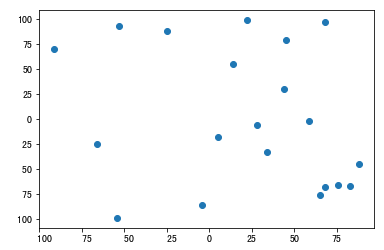

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

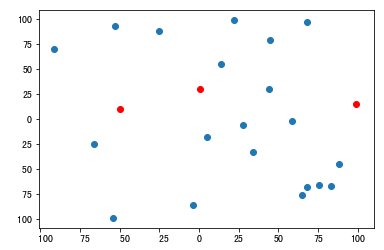

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro